<a href="https://colab.research.google.com/github/JayanthYadav123/mnist-classification/blob/main/Ex3deep%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : G.Jayanth.

Reg No : 212221230030

In [56]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
(60000, 28, 28)

(60000, 28, 28)

In [65]:
X_test.shape

(10000, 28, 28)

In [68]:
(10000, 28, 28)

(10000, 28, 28)

In [69]:
single_image= X_train[2]

In [70]:
single_image.shape

(28, 28)

In [71]:
(28, 28)


(28, 28)

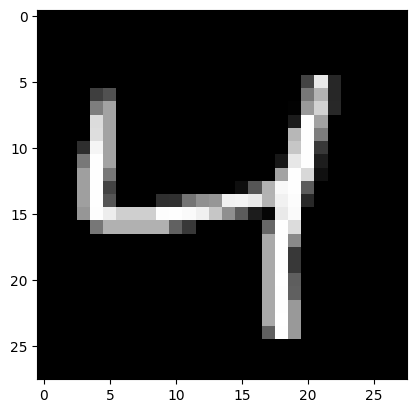

In [72]:
plt.imshow(single_image,cmap='gray')

In [73]:
y_train.shape

(60000,)

In [74]:
X_train.min()

0

In [75]:
X_train.max()

255

In [76]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [77]:
X_train_scaled.min()

0.0

In [78]:

X_train_scaled.max()

1.0

In [79]:

y_train[2]

4

In [80]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [81]:

type(y_train_onehot)

numpy.ndarray

In [82]:
y_train_onehot.shape

(60000, 10)

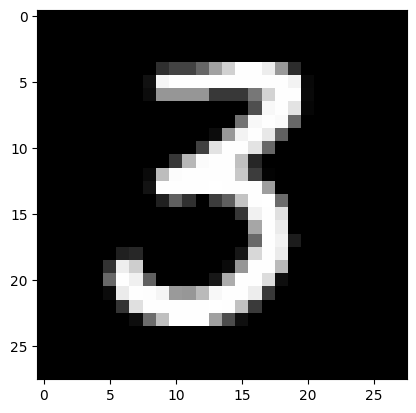

In [85]:
single_image = X_train[767]
plt.imshow(single_image,cmap='gray')

In [86]:

y_train_onehot[55]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [87]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [88]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters =32 , kernel_size =(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [89]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [90]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,batch_size=400, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/10
150/150 [==============================] - 35s 225ms/step - loss: 0.3948 - accuracy: 0.8910 - val_loss: 0.1745 - val_accuracy: 0.9494
Epoch 2/10
150/150 [==============================] - 24s 158ms/step - loss: 0.1336 - accuracy: 0.9615 - val_loss: 0.0958 - val_accuracy: 0.9720
Epoch 3/10
150/150 [==============================] - 24s 159ms/step - loss: 0.0852 - accuracy: 0.9749 - val_loss: 0.0785 - val_accuracy: 0.9754
Epoch 4/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0645 - accuracy: 0.9814 - val_loss: 0.0653 - val_accuracy: 0.9788
Epoch 5/10
150/150 [==============================] - 25s 166ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0559 - val_accuracy: 0.9822
Epoch 6/10
150/150 [==============================] - 25s 170ms/step - loss: 0.0453 - accuracy: 0.9868 - val_loss: 0.0522 - val_accuracy: 0.9817
Epoch 7/10
150/150 [==============================] - 25s 164ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0542 - val_ac

In [91]:
metrics = pd.DataFrame(model.history.history)

In [92]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.394754,0.891033,0.174537,0.9494
1,0.133644,0.961500,0.095803,0.9720
2,0.085167,0.974917,0.078461,0.9754
3,0.064463,0.981367,0.065283,0.9788
4,0.052421,0.984983,0.055857,0.9822


Jayanth 212221230030


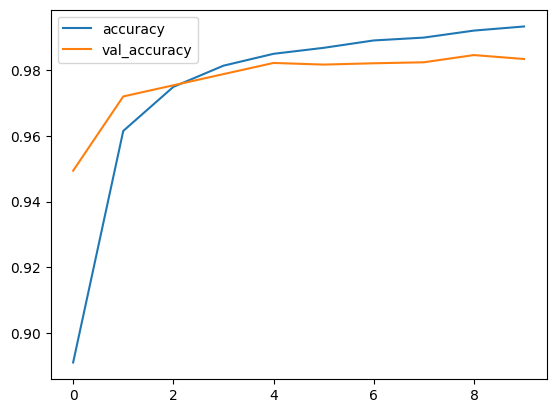

In [93]:
metrics[['accuracy','val_accuracy']].plot()
print("Jayanth 212221230030")

Jayanth 212221230030


<Axes: >

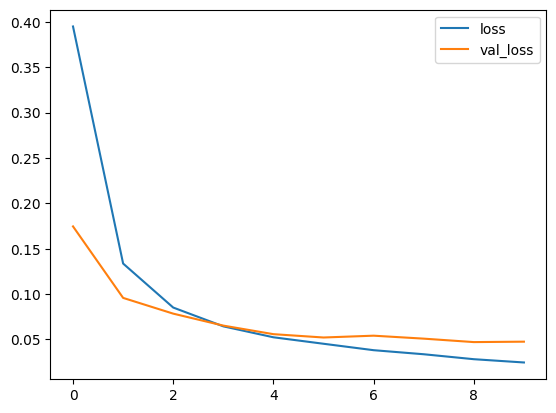

In [94]:
print("Jayanth 212221230030")

metrics[['loss','val_loss']].plot()

In [95]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [96]:

print("Jayanth 212221230300")
print(confusion_matrix(y_test,x_test_predictions))

Jayanth 212221230300
[[ 972    0    3    0    0    1    2    1    1    0]
 [   1 1131    2    1    0    0    0    0    0    0]
 [   1    5 1017    0    2    0    1    5    1    0]
 [   0    0    1  999    0    6    0    1    3    0]
 [   0    1    2    0  971    0    1    0    0    7]
 [   1    0    0    7    0  883    1    0    0    0]
 [   5    3    2    0    1    5  942    0    0    0]
 [   0    4   13    0    1    0    0 1001    1    8]
 [   4    0    6    7    1    4    1    4  941    6]
 [   2    3    0    5    9    4    0    7    2  977]]


In [97]:
print("Jayanth 212221230300")
print(classification_report(y_test,x_test_predictions))

Jayanth 212221230300
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [99]:
img = image.load_img("/content/ex3dep.png")

In [ ]:
type(img)

PIL.Image.Image

Jayanth 212221230030


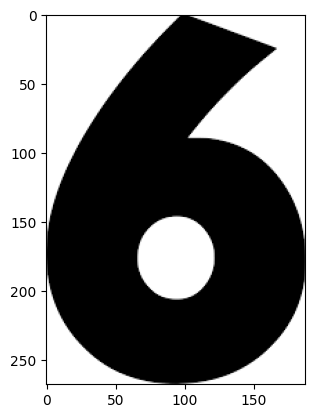

In [100]:
print("Jayanth 212221230030")
img = image.load_img('/content/ex3dep.png')
plt.imshow(img)
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [101]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 33ms/step


In [102]:
print("Jayanth 212221230300")
print(x_single_prediction)



Jayanth 212221230300
[5]


Jayanth 212221230030


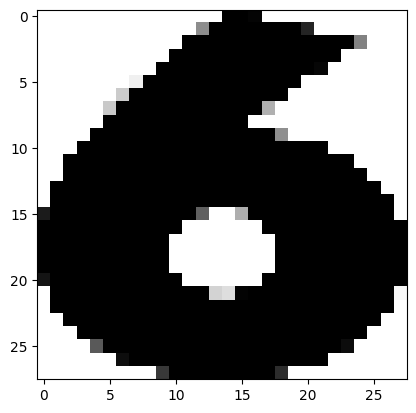

In [103]:
print("Jayanth 212221230030")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')